## Ejercicio Regresión Lineal

Predecir el precio de una casa basado en su tamaño (en metros cuadrados). 

Pasos a seguir:

1. Generar datos sintéticos: Crear un conjunto de datos con diferentes tamaños de casas y sus respectivos precios.
2. Dividir los datos en entrenamiento y prueba.
3. Entrenar un modelo de regresión lineal usando LinearRegression de sklearn.
4. Realizar predicciones con el modelo entrenado.
5. Visualizar los resultados con una gráfica de dispersión y la recta de regresión.

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 1️⃣ Generar datos sintéticos

In [170]:

np.random.seed(42)  # Fijar la semilla para reproducibilidad
X = 50 + 250 * np.random.rand(100, 1)  # Tamaño de casas en metros cuadrados (entre 50 y 300)
y = 50000 + 300 * X + np.random.randn(100, 1) * 10000  # Precio de la casa con ruido

### 2️⃣ Dividir los datos en entrenamiento y prueba (80% - 20%)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3️⃣ Inicializar y entrenar el modelo de regresión lineal

In [172]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4️⃣ Realizar predicciones

In [173]:
y_pred = model.predict(X_test)

### 5️⃣ Evaluar el modelo

In [174]:
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Pendiente (w1): {model.coef_[0][0]:.2f}, Intercepto (w0): {model.intercept_[0]:.2f}")

Error cuadrático medio (MSE): 65369951.37
Pendiente (w1): 283.95, Intercepto (w0): 52231.84


### 6️⃣ Visualizar los resultados

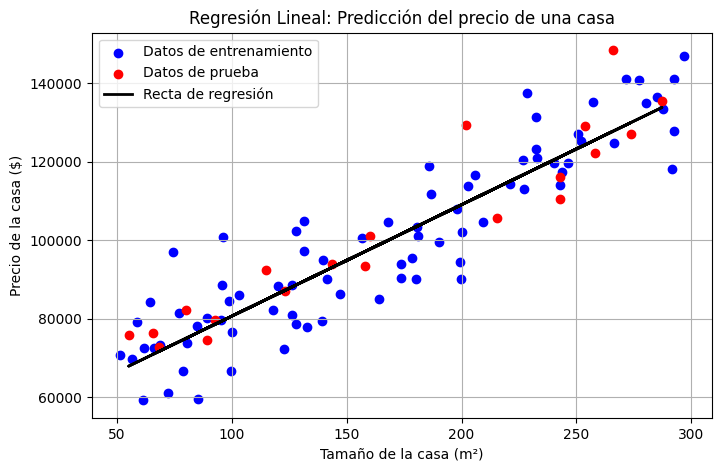

In [175]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color="blue", label="Datos de entrenamiento")
plt.scatter(X_test, y_test, color="red", label="Datos de prueba")
plt.plot(X_test, y_pred, color="black", linewidth=2, label="Recta de regresión")
plt.xlabel("Tamaño de la casa (m²)")
plt.ylabel("Precio de la casa ($)")
plt.title("Regresión Lineal: Predicción del precio de una casa")
plt.legend()
plt.grid(True)
plt.show()

### Preguntas

1. ¿Cómo afecta la pendiente 𝑤1 a la predicción del precio?

2. ¿Qué significa el intercepto 𝑤0?

3. ¿Cómo cambia el modelo si aumentamos el ruido en los datos?

4. Añadir más variables: Incluir más características como el número de habitaciones.

## Parte 2

Ejercicio 2: Implementación de Regresión Lineal Usando Solo NumPy (Sin Scikit-Learn)

Objetivo del ejercicio

Implementar la regresión lineal desde cero, sin utilizar sklearn. 

Aplicar las fórmulas de regresión lineal usando álgebra matricial con NumPy.


In [176]:
# Agregar columna de unos a X para el término de sesgo
X2 = np.c_[np.ones((X.shape[0], 1)), X]  # Agrega una columna de unos (para el sesgo)

In [177]:
# Inicialización de parámetros
w = np.zeros(X2.shape[1])  # Inicializamos los pesos en cero (w0 y w1)
alpha = 0.0000002  # Tasa de aprendizaje (ajustar si es necesario)
epochs = 800 # Número de iteraciones

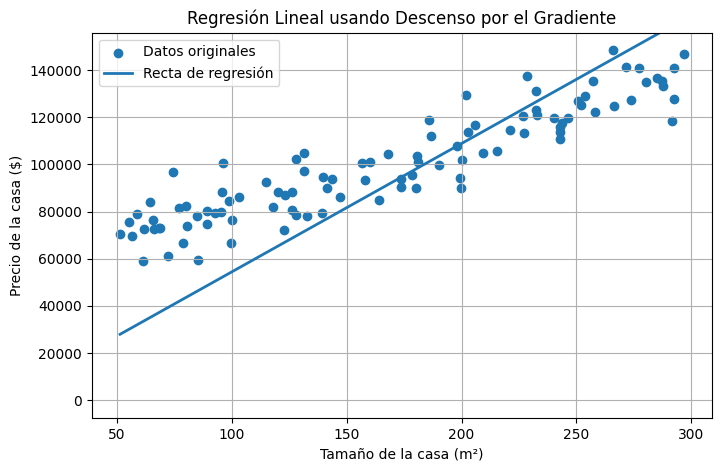

Pesos aprendidos: [  4.10352791 544.13520866]


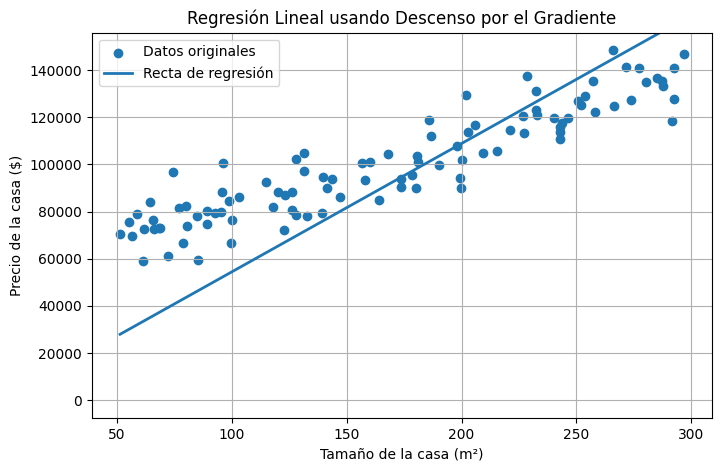

In [178]:
# Algoritmo de descenso por el gradiente
from IPython.display import clear_output, display

# Asumo que ya tienes: X, y, X2, w, alpha, epochs
m = len(y)

# (Opcional pero recomendado) Ordenar por X para que la línea no se "zigzaguee"
order = np.argsort(X.flatten())
X_sorted = X[order]
X2_sorted = X2[order]
y_sorted = y[order]

# Figura base (una sola vez)
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X_sorted, y_sorted, label="Datos originales")
(line,) = ax.plot(X_sorted, X2_sorted @ w, linewidth=2, label="Recta de regresión")
ax.set_xlabel("Tamaño de la casa (m²)")
ax.set_ylabel("Precio de la casa ($)")
ax.set_title("Regresión Lineal usando Descenso por el Gradiente")
ax.legend()
ax.grid(True)

# Mostrar una ÚNICA salida y luego irla reemplazando
display(fig)

for _ in range(epochs):
    # Paso de gradiente
    gradient = (1/m) * X2.T @ (X2 @ w - y.flatten())
    w = w - alpha * gradient

    # Predicción actualizada (usar las filas ordenadas para dibujar bonito)
    y_pred_sorted = X2_sorted @ w
    line.set_ydata(y_pred_sorted)

    # Refrescar la figura SIN crear una nueva salida
    fig.canvas.draw()
    fig.canvas.flush_events()
    clear_output(wait=True)   # borra la salida anterior del CELDA
    display(fig)              # vuelve a mostrar la misma figura actualizada

print("Pesos aprendidos:", w)

In [179]:
# Calcular el Error Cuadrático Medio (MSE)
mse = np.mean((y.flatten() - y_pred) ** 2)
print(f"Error cuadrático medio (MSE): {mse:.2f}")


Error cuadrático medio (MSE): 1012399126.72
